Import the libraries

In [38]:
#Libraries for Wrangling
import pandas as pd
import numpy as np

#Libraries for visualization
import seaborn as sns
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt

#Libraries for building and Validating model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score

Import Dataset

In [2]:
df = pd.read_excel('ANZ synthesised transaction dataset.xlsx')

In [3]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


Removed unwanted columns except salary transactions 

In [4]:
salary_df = df[df['txn_description'] == 'PAY/SALARY']

In [5]:
salary_df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
50,posted,NaN,0,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,NaN,0.0,Isaiah,...,23,NaN,NaN,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,NaN,credit
61,posted,NaN,0,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,NaN,0.0,Marissa,...,23,NaN,NaN,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,CUS-2500783281,NaN,credit
64,posted,NaN,0,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,NaN,0.0,Eric,...,22,NaN,NaN,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,Australia,CUS-326006476,NaN,credit
68,posted,NaN,0,ACC-3541460373,AUD,145.00 -37.83,PAY/SALARY,NaN,0.0,Jeffrey,...,24,NaN,NaN,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,CUS-1433879684,NaN,credit
70,posted,NaN,0,ACC-2776252858,AUD,144.95 -37.76,PAY/SALARY,NaN,0.0,Kristin,...,43,NaN,NaN,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,Australia,CUS-4123612273,NaN,credit


In [6]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883 entries, 50 to 12004
Data columns (total 23 columns):
status               883 non-null object
card_present_flag    0 non-null float64
bpay_biller_code     883 non-null object
account              883 non-null object
currency             883 non-null object
long_lat             883 non-null object
txn_description      883 non-null object
merchant_id          0 non-null object
merchant_code        883 non-null float64
first_name           883 non-null object
balance              883 non-null float64
date                 883 non-null datetime64[ns]
gender               883 non-null object
age                  883 non-null int64
merchant_suburb      0 non-null object
merchant_state       0 non-null object
extraction           883 non-null object
amount               883 non-null float64
transaction_id       883 non-null object
country              883 non-null object
customer_id          883 non-null object
merchant_long_lat    0 non-n

In [7]:
salary_df = salary_df.drop(['status', 
                           'card_present_flag', 
                           'bpay_biller_code', 
                           'currency', 
                           'merchant_id', 
                           'merchant_code', 
                           'merchant_suburb',
                           'merchant_state', 
                           'country', 
                           'merchant_long_lat', 
                           'movement',
                           'txn_description',
                           'extraction',
                           'transaction_id'], axis=1)
salary_df = salary_df.reset_index(drop=True)

In [8]:
salary_df.head()

,account,long_lat,first_name,balance,date,gender,age,amount,customer_id
0,ACC-588564840,151.27 -33.76,Isaiah,8342.11,2018-08-01,M,23,3903.95,CUS-1462656821
1,ACC-1650504218,145.01 -37.93,Marissa,2040.58,2018-08-01,F,23,1626.48,CUS-2500783281
2,ACC-3326339947,151.18 -33.80,Eric,3158.51,2018-08-01,M,22,983.36,CUS-326006476
3,ACC-3541460373,145.00 -37.83,Jeffrey,2517.66,2018-08-01,M,24,1408.08,CUS-1433879684
4,ACC-2776252858,144.95 -37.76,Kristin,2271.79,2018-08-01,F,43,1068.04,CUS-4123612273


Seperate Latitude and Longitude column

In [9]:
long_lat = salary_df['long_lat'].str.split("-", n = 1, expand = True)
salary_df['longitude'] = long_lat[0]
salary_df['latitude'] = long_lat[1]
salary_df = salary_df.drop(['long_lat'], axis = 1)

In [10]:
salary_df.head()

,account,first_name,balance,date,gender,age,amount,customer_id,longitude,latitude
0,ACC-588564840,Isaiah,8342.11,2018-08-01,M,23,3903.95,CUS-1462656821,151.27,33.76
1,ACC-1650504218,Marissa,2040.58,2018-08-01,F,23,1626.48,CUS-2500783281,145.01,37.93
2,ACC-3326339947,Eric,3158.51,2018-08-01,M,22,983.36,CUS-326006476,151.18,33.80
3,ACC-3541460373,Jeffrey,2517.66,2018-08-01,M,24,1408.08,CUS-1433879684,145.00,37.83
4,ACC-2776252858,Kristin,2271.79,2018-08-01,F,43,1068.04,CUS-4123612273,144.95,37.76


***************************************************

In [11]:
customers_list = list(salary_df['customer_id'].unique())

customers_df = []

for cust in customers_list:
    salary_df_subset = salary_df[salary_df['customer_id'] == cust]
    salary_df_subset = salary_df_subset.reset_index(drop=True)
    account = salary_df_subset['account'][0]
    first_name = salary_df_subset['first_name'][0]
    gender = salary_df_subset['gender'][0]
    age = salary_df_subset['age'][0]
    long = salary_df_subset['longitude'][0]
    lat = salary_df_subset['latitude'][0]
    avg_balance = round(sum(salary_df_subset['balance']) / len(salary_df_subset), 2)
    avg_salary = round(sum(salary_df_subset['amount']) / len(salary_df_subset), 2)
    row = (cust, account, first_name, gender, age, long, lat, avg_balance, avg_salary, round(avg_salary*12,2))
    customers_df.append(row)
    
cust_df = pd.DataFrame(customers_df, columns = ('customer_id',
                                                     'account',
                                                     'first_name',
                                                     'gender',
                                                     'age',
                                                     'long',
                                                     'lat',
                                                     'avg_balance',
                                                     'avg_salary',
                                                     'annual_salary')
                          )

# change gender to dummy variable
customer_df = pd.get_dummies(cust_df, columns = ['gender'], drop_first = True)

customer_df.head()

,customer_id,account,first_name,age,long,lat,avg_balance,avg_salary,annual_salary,gender_M
0,CUS-1462656821,ACC-588564840,Isaiah,23,151.27,33.76,15887.91,3903.95,46847.40,1
1,CUS-2500783281,ACC-1650504218,Marissa,23,145.01,37.93,10741.09,1626.48,19517.76,0
2,CUS-326006476,ACC-3326339947,Eric,22,151.18,33.80,8317.03,983.36,11800.32,1
3,CUS-1433879684,ACC-3541460373,Jeffrey,24,145.00,37.83,3877.38,1408.08,16896.96,1
4,CUS-4123612273,ACC-2776252858,Kristin,43,144.95,37.76,5210.70,1068.04,12816.48,0


***********************************************

In [12]:
df_salary = salary_df.groupby(['customer_id','account','first_name','age','longitude','latitude','gender'], as_index = False).agg({
    'balance':'mean',
    'amount':'mean',             
}).reset_index(drop=True)
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
customer_id    100 non-null object
account        100 non-null object
first_name     100 non-null object
age            100 non-null int64
longitude      100 non-null object
latitude       100 non-null object
gender         100 non-null object
balance        100 non-null float64
amount         100 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 7.2+ KB


In [13]:
df_salary.head()

,customer_id,account,first_name,age,longitude,latitude,gender,balance,amount
0,CUS-1005756958,ACC-2828321672,Stephanie,53,153.03,27.51,F,4718.665385,970.47
1,CUS-1117979751,ACC-4065652575,Lucas,21,115.81,31.82,M,11957.202857,3578.65
2,CUS-1140341822,ACC-80388494,Dustin,28,144.97,37.42,M,5841.720000,1916.51
3,CUS-1147642491,ACC-3233697971,Robin,34,151.04,33.77,F,8813.467692,1711.39
4,CUS-1196156254,ACC-3485804958,Jessica,34,138.52,35.01,F,23845.717143,3903.73


In [14]:
df_salary["Annual_salary"] = df_salary["amount"] * 12
df_salary.head()

,customer_id,account,first_name,age,longitude,latitude,gender,balance,amount,Annual_salary
0,CUS-1005756958,ACC-2828321672,Stephanie,53,153.03,27.51,F,4718.665385,970.47,11645.64
1,CUS-1117979751,ACC-4065652575,Lucas,21,115.81,31.82,M,11957.202857,3578.65,42943.80
2,CUS-1140341822,ACC-80388494,Dustin,28,144.97,37.42,M,5841.720000,1916.51,22998.12
3,CUS-1147642491,ACC-3233697971,Robin,34,151.04,33.77,F,8813.467692,1711.39,20536.68
4,CUS-1196156254,ACC-3485804958,Jessica,34,138.52,35.01,F,23845.717143,3903.73,46844.76


In [15]:
df_salary = df_salary.rename(columns = {"balance":"Avg_balance", "amount":"Avg_Salary"})

Data Visualisation

Text(0, 0.5, 'Annual Salary')

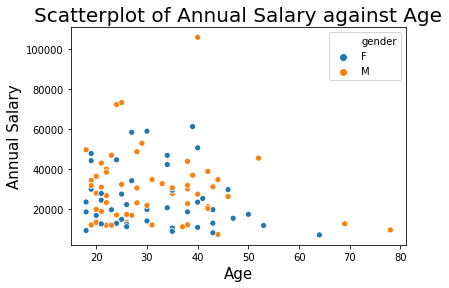

In [16]:
graph_1 = sns.scatterplot(x="age", y="Annual_salary", hue = 'gender',data = df_salary)
graph_1.axes.set_title("Scatterplot of Annual Salary against Age",fontsize=20)
graph_1.set_xlabel("Age", fontsize=15)
graph_1.set_ylabel("Annual Salary", fontsize=15)

Text(0, 0.5, 'Annual Salary')

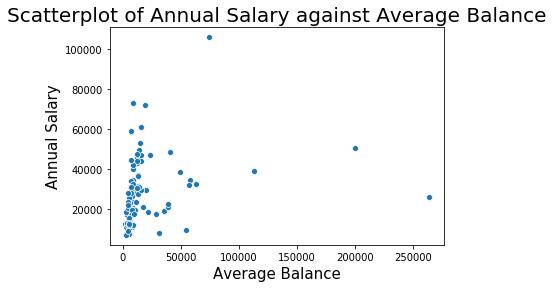

In [17]:
graph_2 = sns.scatterplot(x="Avg_balance", y="Annual_salary", data = df_salary)
graph_2.axes.set_title("Scatterplot of Annual Salary against Average Balance",fontsize=20)
graph_2.set_xlabel("Average Balance", fontsize=15)
graph_2.set_ylabel("Annual Salary", fontsize=15)

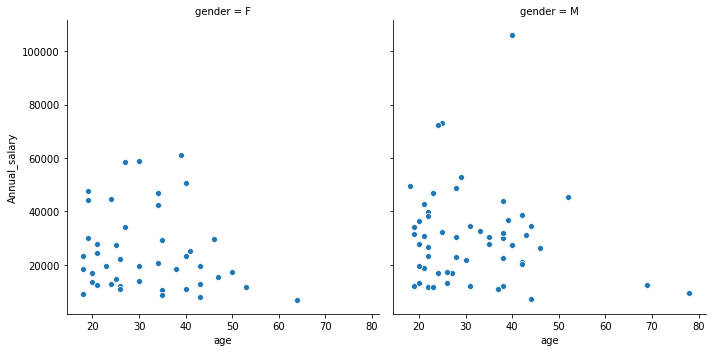

In [18]:
sns.relplot( x="age", y="Annual_salary", col="gender", kind="scatter", data=df_salary)

In [19]:
df_salary = pd.get_dummies(df_salary, columns = ['gender'], drop_first = True)
df_salary.head()

,customer_id,account,first_name,age,longitude,latitude,Avg_balance,Avg_Salary,Annual_salary,gender_M
0,CUS-1005756958,ACC-2828321672,Stephanie,53,153.03,27.51,4718.665385,970.47,11645.64,0
1,CUS-1117979751,ACC-4065652575,Lucas,21,115.81,31.82,11957.202857,3578.65,42943.80,1
2,CUS-1140341822,ACC-80388494,Dustin,28,144.97,37.42,5841.720000,1916.51,22998.12,1
3,CUS-1147642491,ACC-3233697971,Robin,34,151.04,33.77,8813.467692,1711.39,20536.68,0
4,CUS-1196156254,ACC-3485804958,Jessica,34,138.52,35.01,23845.717143,3903.73,46844.76,0


Linear Regression

In [29]:
# Split data
train, test = train_test_split(df_salary, test_size=0.2)
X = train[['age', 'Avg_balance', 'longitude', 'latitude', 'gender_M']]
y = train['Annual_salary']
X_test = test[['age', 'Avg_balance', 'longitude', 'latitude', 'gender_M']]
y_test = test['Annual_salary']

lm = LinearRegression()

In [30]:
lm.fit(X,y.values.reshape((-1,1)))
# R-squared value
lm.score(X, y)

0.14214744724524453

In [31]:
y_predict = lm.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

14558.778770394243


Lower RMSE means better model so checked with other model as well

Decision Tree

In [41]:
dt =  DecisionTreeRegressor(max_depth=5,random_state=1)
dt.fit(X,y)

# R-squared value
dt.score(X, y)

0.7998404233566085

In [42]:
y_predict_dt = dt.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_predict_dt)))

12880.200795725119


Decision Tree Model achieved less RMSE and better R squared value than Linear Regression Model still this means absoulte fit of the model is much worse. I do not recommend either model to classify the customer without improvement in the model 

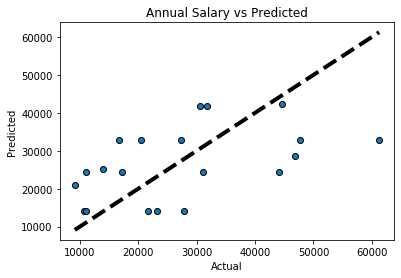

In [45]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict_dt, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Annual Salary vs Predicted")
plt.show()